In [1]:
import keras
import cv2
import os 
import numpy as np
from keras.models import model_from_json

Using TensorFlow backend.
Using TensorFlow backend.


In [2]:
model = model_from_json(open('model.json').read())
model.load_weights('weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.


In [3]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)

In [4]:
while True:
    ret,frame=cap.read()
    
    frame1=frame
    cv2.imwrite("fullimage.jpg",frame1)
    
    #cv2.imshow('frame1',frame1)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        image=frame[y:y+h,x:x+w]
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        #cv2.imshow('Press v to click',image)
        image = cv2.resize(image,(200,200), interpolation = cv2.INTER_CUBIC)
        #roi_gray=gray[y:y+h,x:x+h]
        #roi_color=frame[y:y+h,x:x+h]
        '''
        eyes=eye_cascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            '''
    cv2.imshow('Press blah blah blah to click',frame)
    if cv2.waitKey(1) & 0xff==ord('x'):
        cv2.imwrite("imageuse.jpg",image)
        break

In [5]:
X=cv2.imread("imageuse.jpg")

In [6]:
image = cv2.resize(X,(64,64), interpolation = cv2.INTER_CUBIC)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = image.reshape(1,64,64,1)
predict = model.predict(image)
predict = predict[0]*10000000
for i in range(len(predict)):
    predict[i]=int(predict[i])
print(predict*100)

[3.500000e+03 0.000000e+00 0.000000e+00 9.999963e+08 0.000000e+00
 0.000000e+00 0.000000e+00 2.000000e+02]
[3.500000e+03 0.000000e+00 0.000000e+00 9.999963e+08 0.000000e+00
 0.000000e+00 0.000000e+00 2.000000e+02]


In [7]:
import matplotlib.pyplot as plt

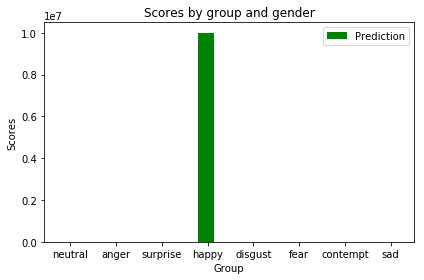

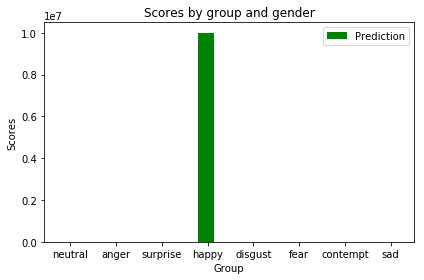

In [8]:
n_groups = len(predict)
index = np.arange(n_groups)
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 1.0
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, predict, bar_width,
                 alpha=opacity,
                 color='g',
                 error_kw=error_config,
                 label='Prediction')
plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width/12, ('neutral', 'anger', 'surprise', 'happy', 'disgust','fear','contempt','sad'))
plt.legend()
plt.tight_layout()
plt.show()